In [1]:
import matplotlib
from matplotlib import pylab
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.dpi'] = 80
textsize = 'x-large'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (6, 4),
         'axes.labelsize': textsize,
         'axes.titlesize': textsize,
         'xtick.labelsize': textsize,
         'ytick.labelsize': textsize,
         'figure.facecolor': 'w'}
pylab.rcParams.update(params)
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D

import glob
import numpy as np
import os

%load_ext autoreload
%autoreload 2
import sys

sys.path.insert(1, '../code')
import plotter
from utils import *

sys.path.insert(1, '../../clust')
import clustering_statistics as cs

In [2]:
training_dir_base = '/home/users/ksf293/clust/results_aemulus_train'
plot_dir = '../plots/plots_2022-05-02'
!mkdir -p $plot_dir

## Test out effect of pi_max

In [59]:
cosmo_id = 1
hod_id = 12
test = 0
L = 1050.
redshift = 0.57
mock_dir = '/mount/sirocco2/zz681/emulator/CMASSLOWZ/galaxy_mocks/mocks'
mock_name = f'mock_cosmo_{cosmo_id}_HOD_{hod_id}_test_{test}.mock'
fn_mock = f'{mock_dir}/{mock_name}'

In [60]:
def real_to_zspace(position, velocity, L, redshift, Omega_m, w):
    position = np.array(position)
    velocity = np.array(velocity)
    E = np.sqrt(Omega_m*(1+redshift)**3 +
                (1-Omega_m)*(1+redshift)**(3*(1+w)))
    position = (position + velocity*(1+redshift)/(E*100))%L
    return position

In [61]:
print("Loading data")
x, y, z, _, _, vz = np.loadtxt(fn_mock, usecols=range(6), unpack=True)

print("Get cosmology values")
cosmofn = '/mount/sirocco1/zz681/emulator/CMASS/Gaussian_Process/hod_file/cosmology_camb_full.dat'
Omega_ms, ws = np.loadtxt(cosmofn, usecols=[0, 6], unpack=True)
Omega_m = Omega_ms[cosmo_id]
w = ws[cosmo_id]

print("Converting to redshift space along z-axis")
z = real_to_zspace(z, vz, L, redshift, Omega_m, w)

Loading data
Get cosmology values
Converting to redshift space along z-axis


In [62]:
wp_arr = []
pi_max_arr = np.arange(10.0, 130.0, 10.0)
r_min, r_max = 0.1, 50
n_bins = 9
fn_save = '/tmp/wp.dat'
for pi_max in pi_max_arr:
    r_avg, wp = cs.compute_wprp(x, y, z, L, r_min, r_max, n_bins, fn_save, pi_max=pi_max)
    wp_arr.append(wp)
    
wp_arr = np.array(wp_arr)
wp_40 = wp_arr[np.where(pi_max_arr==40.0)[0][0]]

Computing wp(rp)
Saving
Computing wp(rp)
Saving
Computing wp(rp)
Saving
Computing wp(rp)
Saving
Computing wp(rp)
Saving
Computing wp(rp)
Saving
Computing wp(rp)
Saving
Computing wp(rp)
Saving
Computing wp(rp)
Saving
Computing wp(rp)
Saving
Computing wp(rp)
Saving
Computing wp(rp)
Saving


Text(0, 0.5, '$w_{\\mathrm{p}} / w_{\\mathrm{p},40}$')

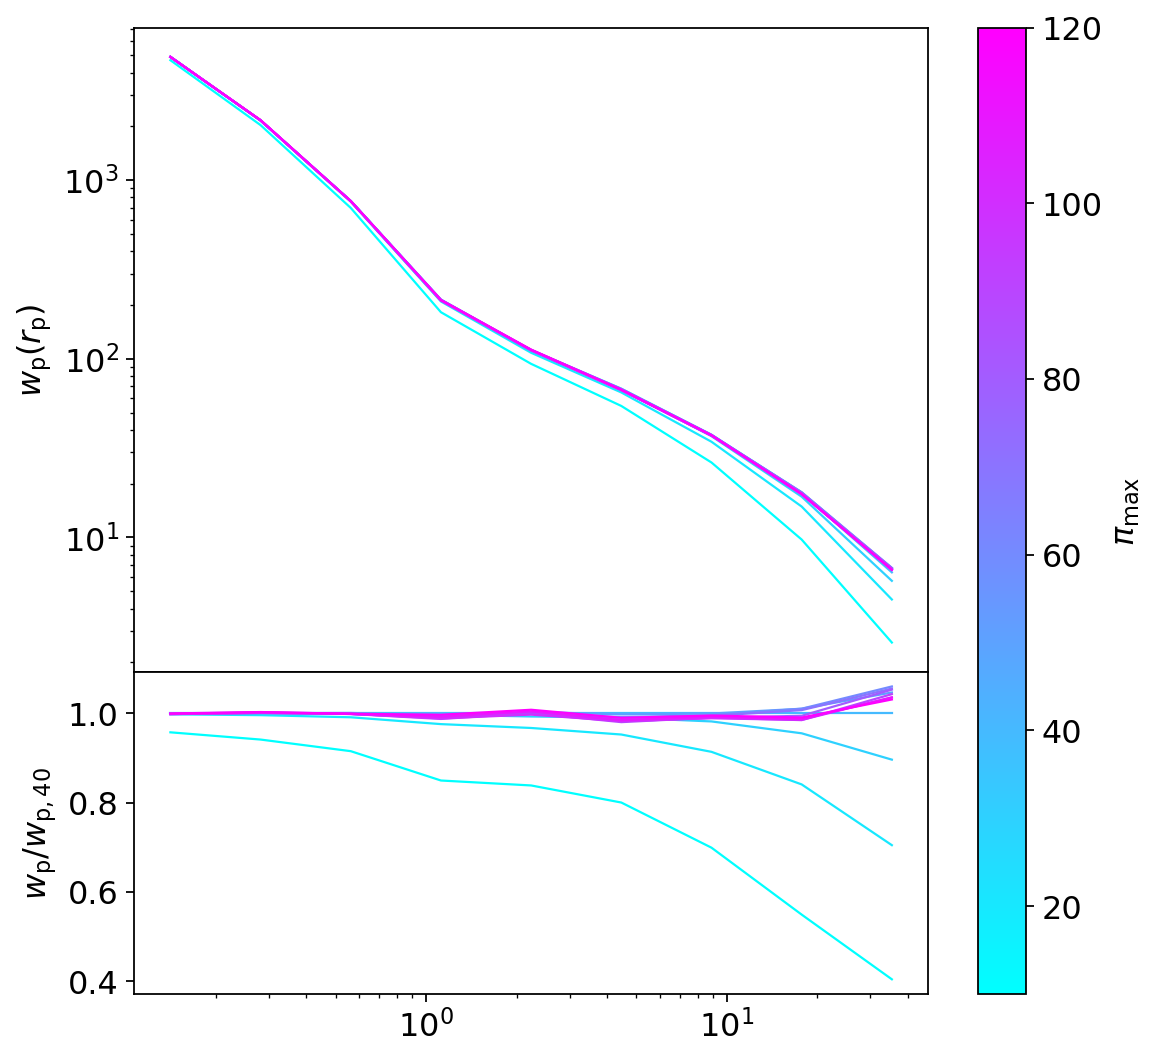

In [63]:
fig, axarr = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(8,8), gridspec_kw={'height_ratios': [2, 1]})
plt.subplots_adjust(hspace=0)
ax0, ax1 = axarr
r = r_arr[0] #assume all r's are the same
#for i in range(len(y_train_arr)):

locs_norm = matplotlib.colors.Normalize(vmin=np.min(pi_max_arr), vmax=np.max(pi_max_arr))
cmap = matplotlib.cm.get_cmap('cool')

for i, pi_max in enumerate(pi_max_arr):
    ax0.plot(r, wp_arr[i], color=cmap(locs_norm(pi_max)), alpha=1, lw=1)
    if np.allclose(y_train_arr[i], y_train_arr_wp[i]):
        print(f"all close! {i}")
    ax1.plot(r, wp_arr[i]/wp_40, color=cmap(locs_norm(pi_max)), alpha=1, lw=1)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=locs_norm)
fig.colorbar(sm, label=r'$\pi_\mathrm{max}$', ax=axarr.ravel().tolist(),)


ax0.set_xscale(scale_dict[statistic_wp][0])
ax0.set_yscale(scale_dict[statistic_wp][1])

ax1.set_xscale(scale_dict[statistic_wp][0])

ax0.set_xlabel(r_labels[statistic_wp])
ax0.set_ylabel(stat_labels[statistic_wp])
ax1.set_ylabel(r'$w_{\mathrm{p}} / w_{\mathrm{p},40}$')


## Check out all of them

In [6]:
statistic = 'wp80'
training_dir = f'{training_dir_base}/results_{statistic}'

fns_y_train = os.listdir(training_dir)
r_arr = []
y_train_arr = []
for fn_y_train in fns_y_train:
    r_vals, y_train = np.loadtxt(os.path.join(training_dir, fn_y_train), delimiter=',', unpack=True)
    r_arr.append(r_vals)
    y_train_arr.append(y_train)
r_arr = np.array(r_arr)
y_train_arr = np.array(y_train_arr)
print(y_train_arr.shape)

(4000, 9)


In [66]:
statistic_wp = 'wp'
training_dir_wp = f'{training_dir_base}/results_{statistic_wp}'
fns_y_train_wp = os.listdir(training_dir_wp)
r_arr_wp = []
y_train_arr_wp = []
for fn_y_train in fns_y_train_wp:
    r_vals, y_train = np.loadtxt(os.path.join(training_dir_wp, fn_y_train), delimiter=',', unpack=True)
    r_arr_wp.append(r_vals)
    y_train_arr_wp.append(y_train)
r_arr_wp = np.array(r_arr_wp)
y_train_arr_wp = np.array(y_train_arr_wp)
print(y_train_arr_wp.shape)

(4000, 9)


In [ ]:
statistic = 'wp80'
training_dir = f'{training_dir_base}/results_{statistic}'

fns_y_train = os.listdir(training_dir)
r_arr = []
y_train_arr = []
for fn_y_train in fns_y_train:
    r_vals, y_train = np.loadtxt(os.path.join(training_dir, fn_y_train), delimiter=',', unpack=True)
    r_arr.append(r_vals)
    y_train_arr.append(y_train)
r_arr = np.array(r_arr)
y_train_arr = np.array(y_train_arr)
print(y_train_arr.shape)

In [7]:
testing_dir_base = '/home/users/ksf293/clust/results_aemulus_test'
statistic = 'wp80'
testing_dir = f'{testing_dir_base}/results_{statistic}'

fns_y_test = os.listdir(testing_dir)
r_test_arr = []
y_test_arr = []
for fn_y_test in fns_y_test:
    r_vals, y_test = np.loadtxt(os.path.join(testing_dir, fn_y_test), delimiter=',', unpack=True)
    r_test_arr.append(r_vals)
    y_test_arr.append(y_test)
r_test_arr = np.array(r_test_arr)
y_test_arr = np.array(y_test_arr)
print(y_test_arr.shape)

(3500, 9)


In [10]:
def plot_wprp(statistic, r_arr, y_arr, ylabel_note='', fn_save=None):
    plt.figure(figsize=(8,6))
    ax = plt.gca()
    r = r_arr[0] #assume all r's are the same
    for i in range(len(y_arr)):
        plt.plot(r, y_arr[i], color='grey', alpha=0.2, lw=0.5)
    y_mean = np.mean(y_arr, axis=0)
    plt.plot(r, y_mean, color='k', lw=2, label='mean measurement')

    plt.xscale(scale_dict[statistic][0])
    plt.yscale(scale_dict[statistic][1])
    
    plt.xlabel(r_labels[statistic])
    plt.ylabel(stat_labels[statistic] + ylabel_note)
    
    handles, labels = ax.get_legend_handles_labels()
    line = Line2D([0], [0], color='grey', label='measurement on unique\ncosmo+HOD model', lw=0.5)
    handles.insert(0,line) 
    plt.legend(handles=handles, loc='best', fontsize=12)
    if fn_save is not None:
        plt.savefig(f'{plot_dir}/{fn_save}.png', bbox_inches='tight')

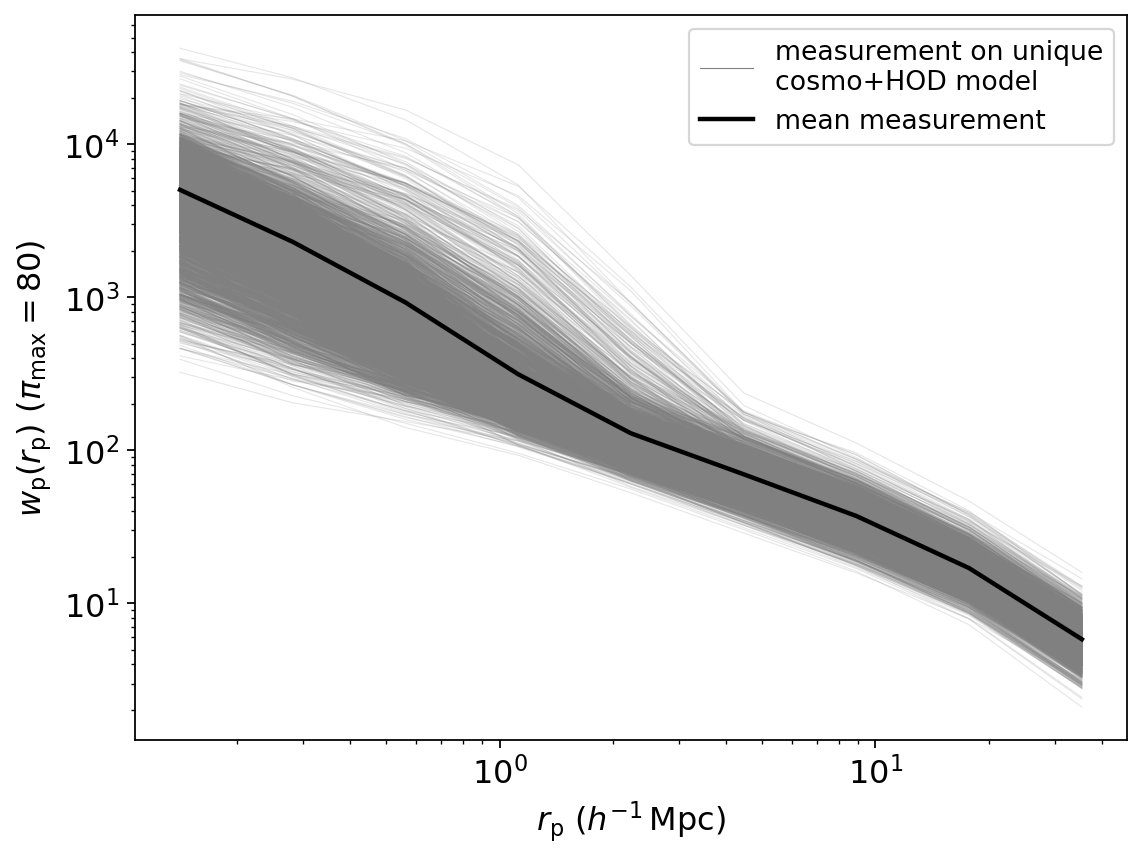

In [68]:
#fn_save = f'{statistic}_training'
fn_save = None
plot_wprp(statistic, r_arr, y_train_arr, ylabel_note=r' ($\pi_\mathrm{max}=80$)', fn_save=fn_save)

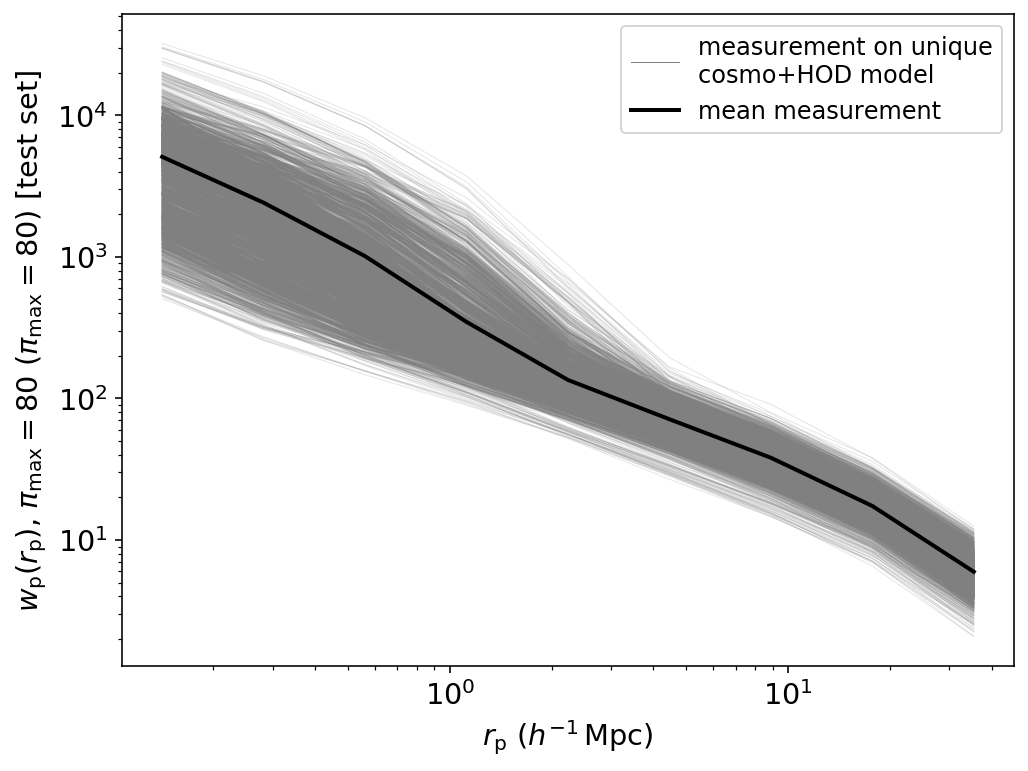

In [11]:
#fn_save = f'{statistic}_testing'
fn_save = None
plot_wprp(statistic, r_test_arr, y_test_arr, ylabel_note=r' ($\pi_\mathrm{max}=80$) [test set]', fn_save=fn_save)

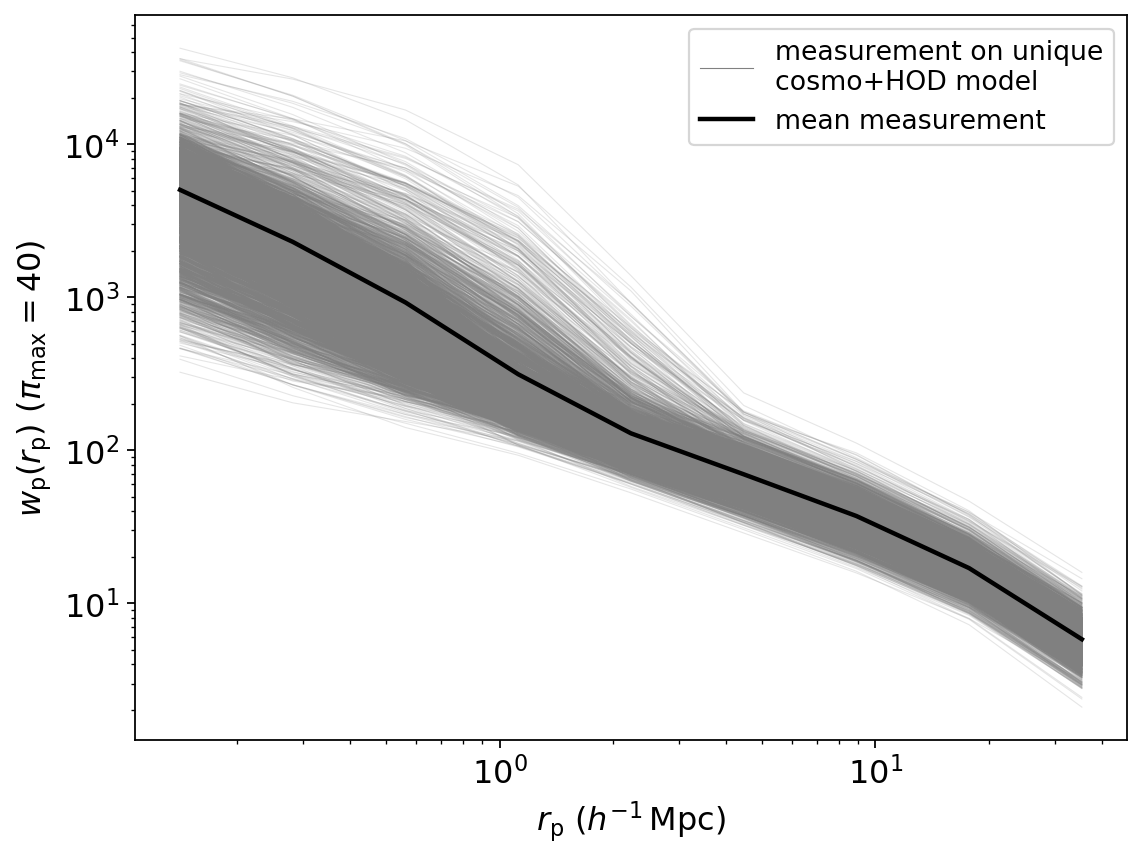

In [69]:
#fn_save = f'{statistic}_training'
fn_save = None
plot_wprp(statistic, r_arr, y_train_arr, ylabel_note=r' ($\pi_\mathrm{max}=40$)', fn_save=fn_save)

Text(0, 0.5, '$w_{\\mathrm{p},80} / w_{\\mathrm{p},40}$')

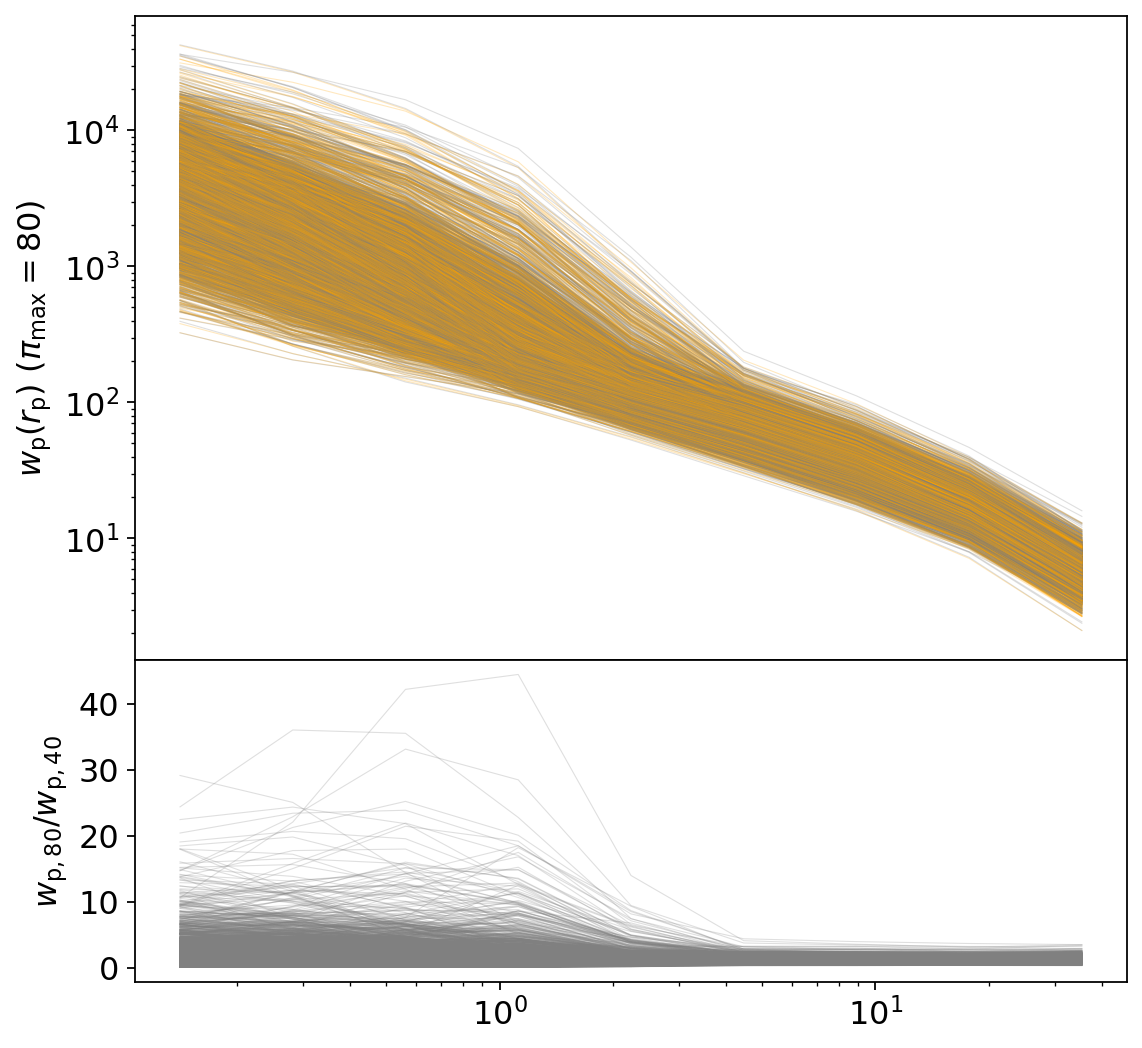

In [72]:
fig, axarr = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(8,8), gridspec_kw={'height_ratios': [2, 1]})
plt.subplots_adjust(hspace=0)
ax0, ax1 = axarr
r = r_arr[0] #assume all r's are the same
for i in range(len(y_train_arr)):
#for i in range(1):
    ax0.plot(r, y_train_arr[i], color='grey', alpha=0.25, lw=0.5)
    ax0.plot(r, y_train_arr_wp[i], color='orange', alpha=0.25, lw=0.5)
    ax1.plot(r, y_train_arr[i]/y_train_arr_wp[i], color='grey', alpha=0.25, lw=0.5)

ax0.set_xscale(scale_dict[statistic_wp][0])
ax0.set_yscale(scale_dict[statistic_wp][0])

ax1.set_xscale(scale_dict[statistic_wp][0])

ax0.set_xlabel(r_labels[statistic_wp])
ax0.set_ylabel(stat_labels[statistic_wp] + r' ($\pi_\mathrm{max}=80$)')
ax1.set_ylabel(r'$w_{\mathrm{p},80} / w_{\mathrm{p},40}$')


# Test emulator

In [3]:
stat_labels

{'wp': '$w_\\mathrm{p}$($r_\\mathrm{p}$)',
 'upf': '$P_\\mathrm{U}(s)$',
 'mcf': '$M(s)$',
 'xi': '$\\xi_0(s)$',
 'xi2': '$\\xi_2(s)$',
 'wp80': '$w_\\mathrm{p}$($r_\\mathrm{p}$), $\\pi_\\mathrm{max}=80$'}

[1.37567762e-04 2.23276041e-04 3.01280488e-04 1.73738144e-04
 8.96687108e-05 1.01233125e-04 1.62602524e-04 4.54715090e-04
 2.58545053e-03]
[0.00014762 0.00023673 0.0003136  0.0001891  0.00015495 0.00017919
 0.00031298 0.00064283 0.00509088]


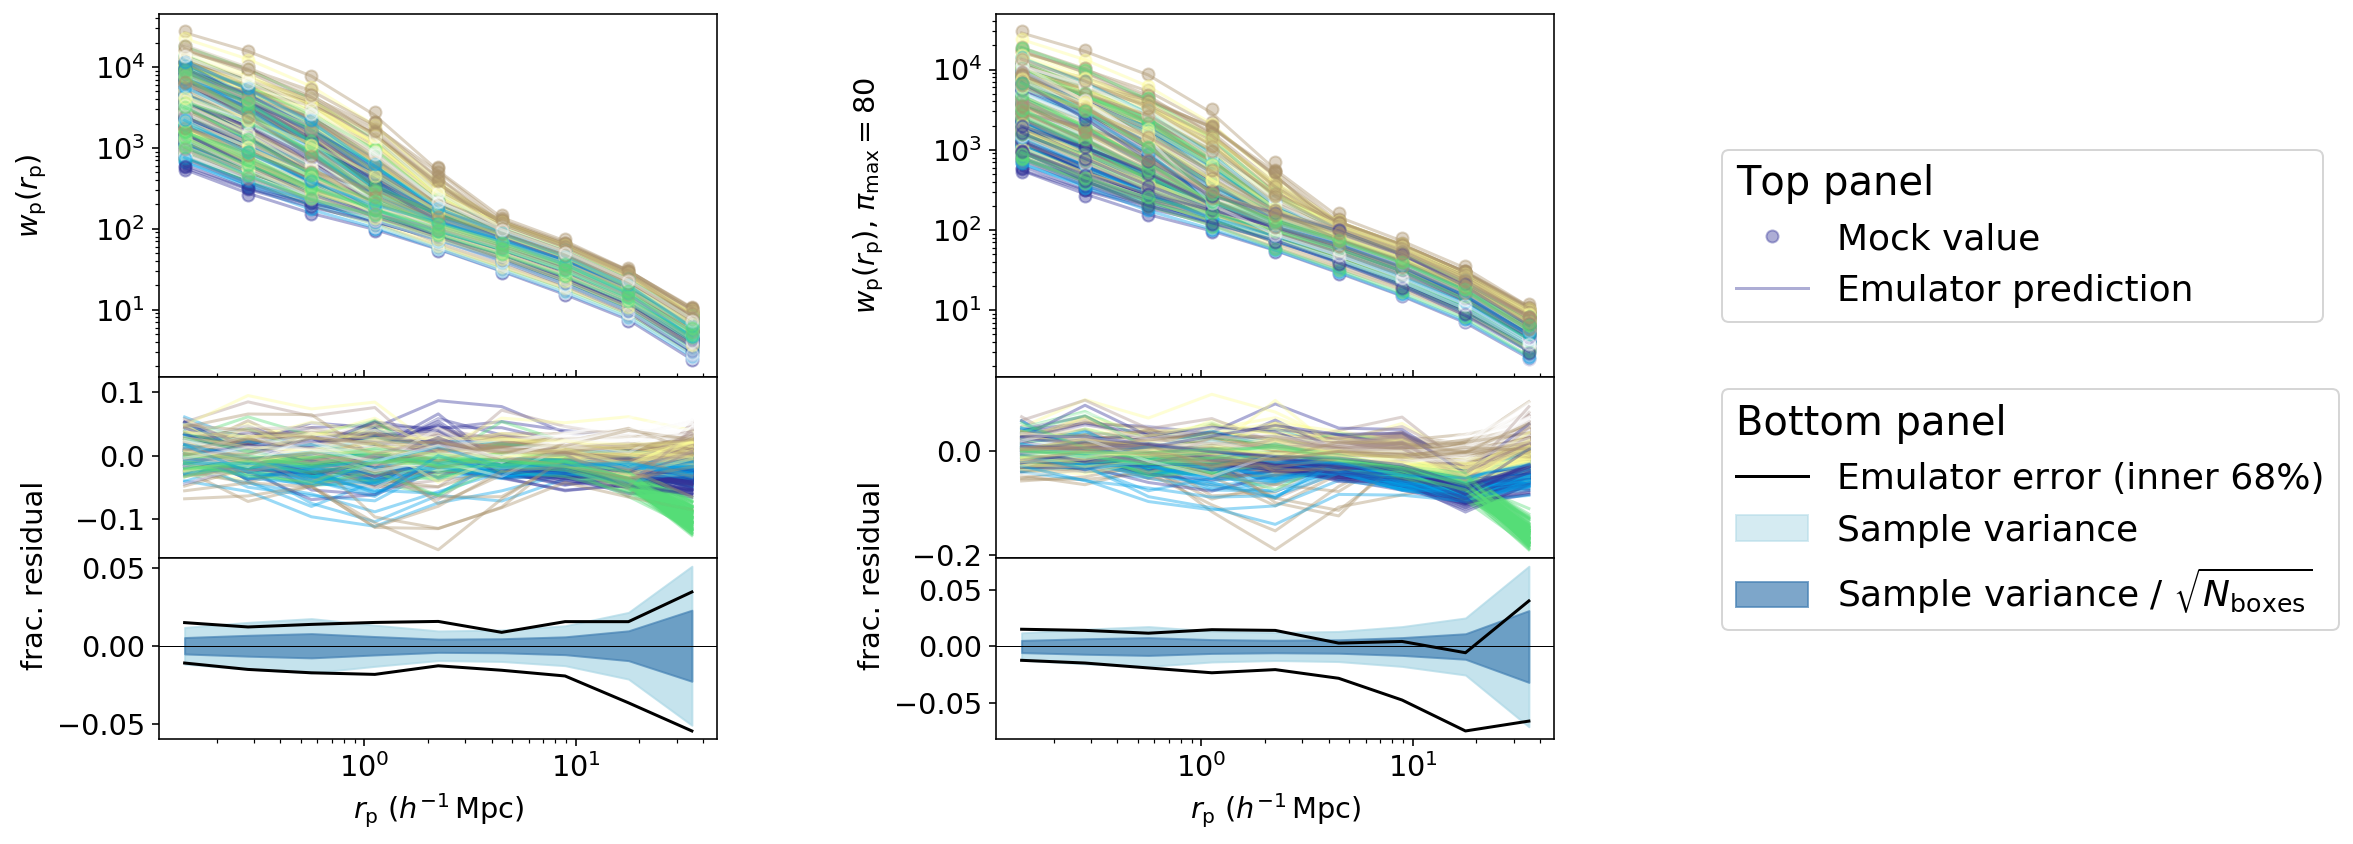

In [18]:
statistics = ['wp', 'wp80']
train_tags = [f'_{get_fiducial_emu_name(s)}_{get_fiducial_emu_scaling(s)}' for s in statistics]
plotter.plot_accuracy_figure(statistics, train_tags)